# Problem Statement
A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month.
The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

* Data
* Variable	Definition
* User_ID	User ID
* Product_ID	Product ID
* Gender	Sex of User
* Age	Age in bins
* Occupation	Occupation (Masked)
* City_Category	Category of the City (A,B,C)
* Stay_In_Current_City_Years	Number of years stay in current city
* Marital_Status	Marital Status
* Product_Category_1	Product Category (Masked)
* Product_Category_2	Product may belongs to other category also (Masked)
* Product_Category_3	Product may belongs to other category also (Masked)
* Purchase	Purchase Amount (Target Variable)

#### importing required libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### reading the train data

In [137]:
df1=pd.read_csv('train.csv')
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365


In [138]:
df1.shape

(550068, 12)

#### reading the test data

In [139]:
df2=pd.read_csv('test.csv')
df2

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...
233594,1006036,P00118942,F,26-35,15,B,4+,1,8,NaN,NaN
233595,1006036,P00254642,F,26-35,15,B,4+,1,5,8.0,NaN
233596,1006036,P00031842,F,26-35,15,B,4+,1,1,5.0,12.0
233597,1006037,P00124742,F,46-50,1,C,4+,0,10,16.0,NaN


In [140]:
df2.shape

(233599, 11)

#### merging the both dataset

In [141]:
df=df1.append(df2,sort=False)

In [142]:
df.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [143]:
df.info() #### getting all the info the dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [144]:
df.describe() ##looking at statistical information of dataset

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [145]:
df.columns  ### all columns 

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [146]:
###Missing values 
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

#### Gender column

In [147]:
df['Gender'].value_counts()

M    590031
F    193636
Name: Gender, dtype: int64

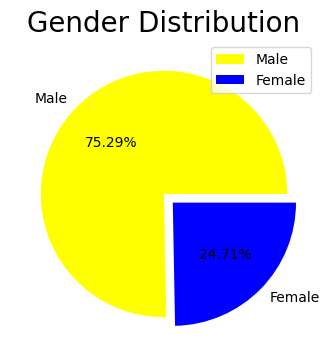

In [148]:
size=[590031,193636]
labels=['Male','Female']
colors=['Yellow','Blue']
explode = [0, 0.1]

plt.pie(size,labels=labels,colors=colors,autopct='%.2f%%', explode = explode)
plt.title('Gender Distribution',fontsize=20)
plt.legend()
plt.show()

In [149]:
###finding the maximum purchase in male and female
df.groupby('Gender')['Purchase'].max()

Gender
F    23959.0
M    23961.0
Name: Purchase, dtype: float64

In [150]:
###finding the minimum purchase in male and female
df.groupby('Gender')['Purchase'].min()

Gender
F    12.0
M    12.0
Name: Purchase, dtype: float64

In [151]:
###checking the dependency of gender on opurchase amount
df.groupby('Gender')['Purchase'].mean()

Gender
F    8734.565765
M    9437.526040
Name: Purchase, dtype: float64

#### Age column

In [152]:
df['Age'].value_counts()

26-35    313015
36-45    156724
18-25    141953
46-50     65278
51-55     54784
55+       30579
0-17      21334
Name: Age, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


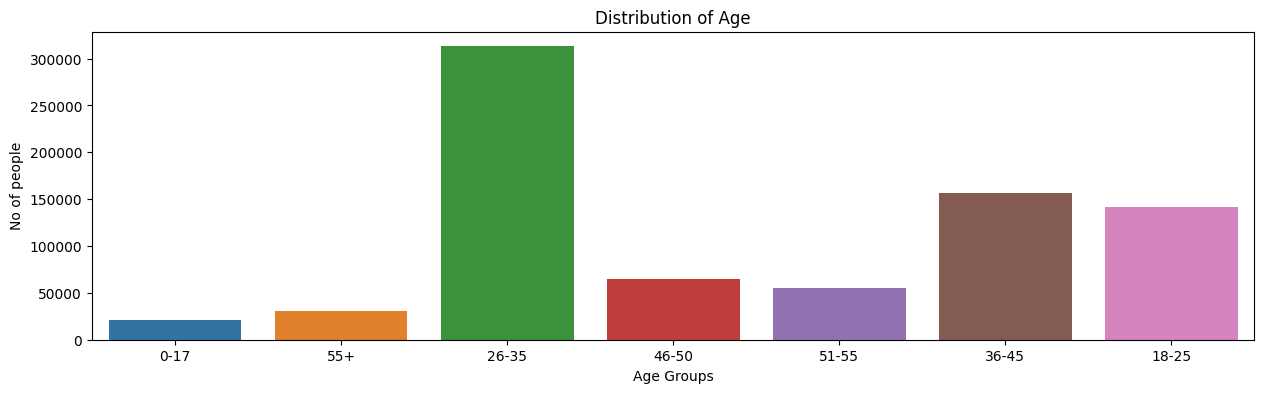

In [153]:
### visualising age of customers
sns.countplot(df['Age'])
plt.xlabel('Age Groups')
plt.ylabel('No of people')
plt.title('Distribution of Age')
plt.show()

In [154]:
df.groupby('Age')['Purchase'].mean()

Age
0-17     8933.464640
18-25    9169.663606
26-35    9252.690633
36-45    9331.350695
46-50    9208.625697
51-55    9534.808031
55+      9336.280459
Name: Purchase, dtype: float64

#### Occupation column

In [155]:
df['Occupation'].value_counts()

4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


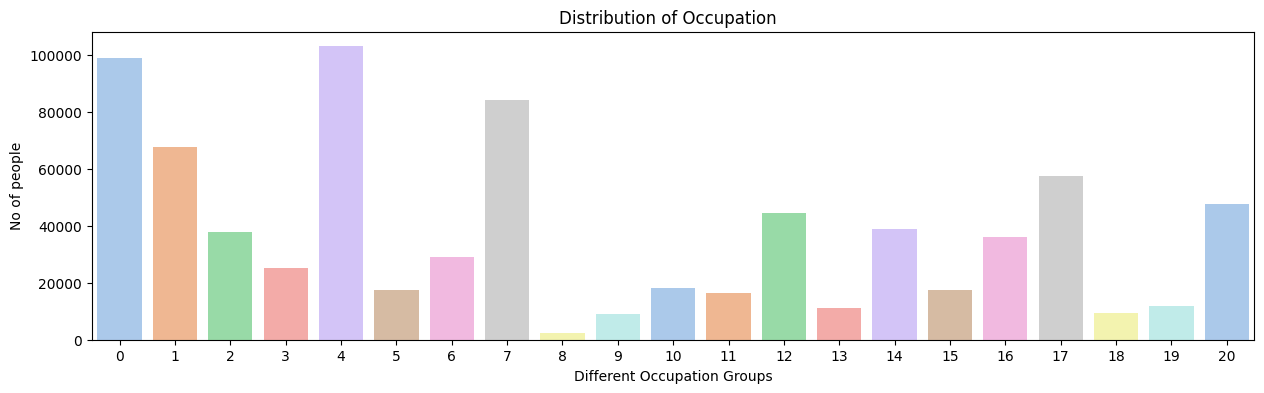

In [156]:
### visualising occupation of customers
sns.countplot(df['Occupation'],palette='pastel')
plt.xlabel('Different Occupation Groups')
plt.ylabel('No of people')
plt.title('Distribution of Occupation  ')
plt.show()

In [157]:
#### Mean of purchasing of different occupations
df[['Occupation','Purchase']].groupby('Occupation').mean()

,Purchase
Occupation,
0,9124.428588
1,8953.193270
2,8952.481683
3,9178.593088
4,9213.980251
5,9333.149298
6,9256.535691
7,9425.728223
8,9532.592497


#### City column

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


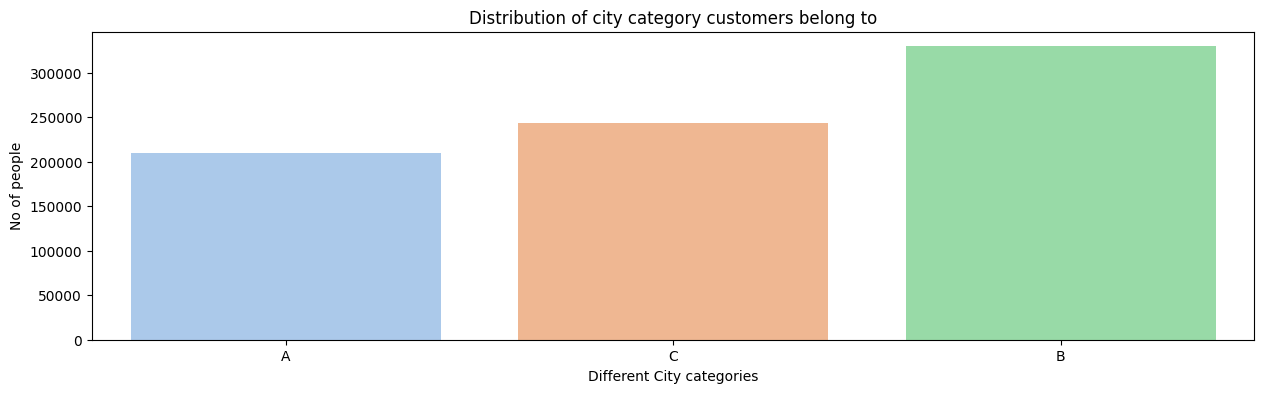

In [158]:
### visualising city of customers
sns.countplot(df['City_Category'],palette='pastel')
plt.xlabel('Different City categories')
plt.ylabel('No of people')
plt.title('Distribution of city category customers belong to')
plt.show()

In [159]:
# checking the dependency of cities where custoer live with the purchasing power

df[['City_Category', 'Purchase']].groupby('City_Category').mean()

,Purchase
City_Category,
A,8911.939216
B,9151.300563
C,9719.920993


#### Years of stay in current city

In [160]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+','') ##replacingg the + sign using str replace method

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


In [161]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].astype(int)### changing the datatype of the column

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


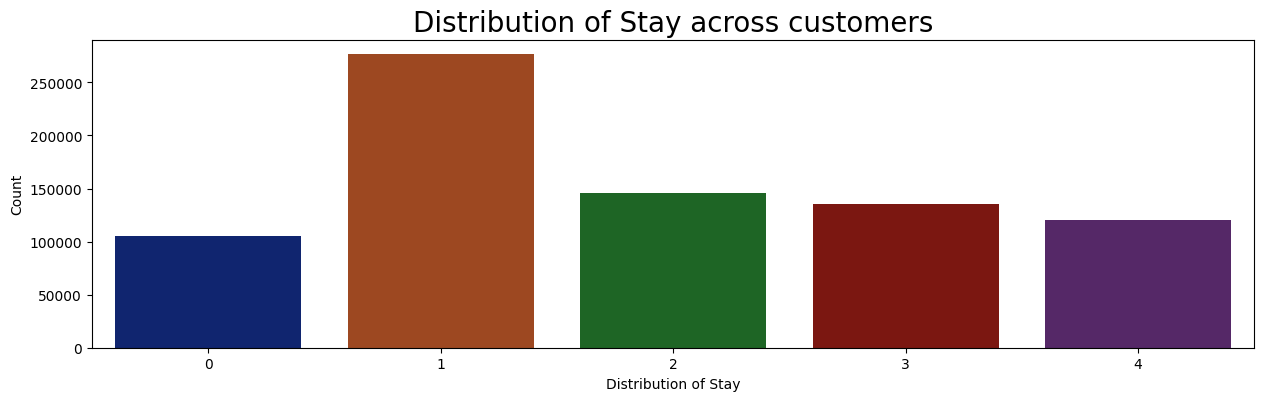

In [162]:
# visualizing the stay in current years


sns.countplot(df['Stay_In_Current_City_Years'], palette = 'dark')
plt.title('Distribution of Stay across customers', fontsize = 20)
plt.xlabel('Distribution of Stay')
plt.ylabel('Count')
plt.show()

In [163]:
# checking the dependency of stay in purchasing power

df[['Stay_In_Current_City_Years', 'Purchase']].groupby('Stay_In_Current_City_Years').mean()

,Purchase
Stay_In_Current_City_Years,
0,9180.075123
1,9250.145923
2,9320.429810
3,9286.904119
4,9275.598872


#### Marital status 

In [164]:
df['Marital_Status'].value_counts()

0    462538
1    321129
Name: Marital_Status, dtype: int64

In [165]:
size=[462538,321129]
colors=['green','orange']
explode=[0,0.1]
labels=['Unmarried','Married']

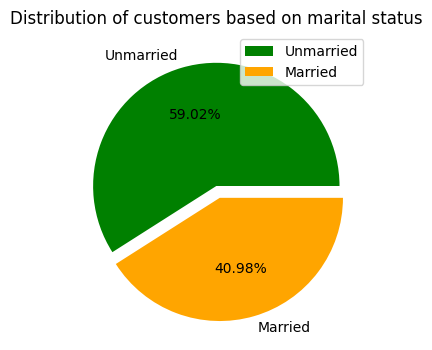

In [166]:
plt.pie(size,colors=colors,labels=labels,explode=explode,autopct='%.2f%%')
plt.legend()
plt.title('Distribution of customers based on marital status')
plt.show()


In [167]:
# checking the dependency of stay in purchasing power

df[['Marital_Status', 'Purchase']].groupby('Marital_Status').mean()

,Purchase
Marital_Status,
0,9265.907619
1,9261.174574


#### Product Categories

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


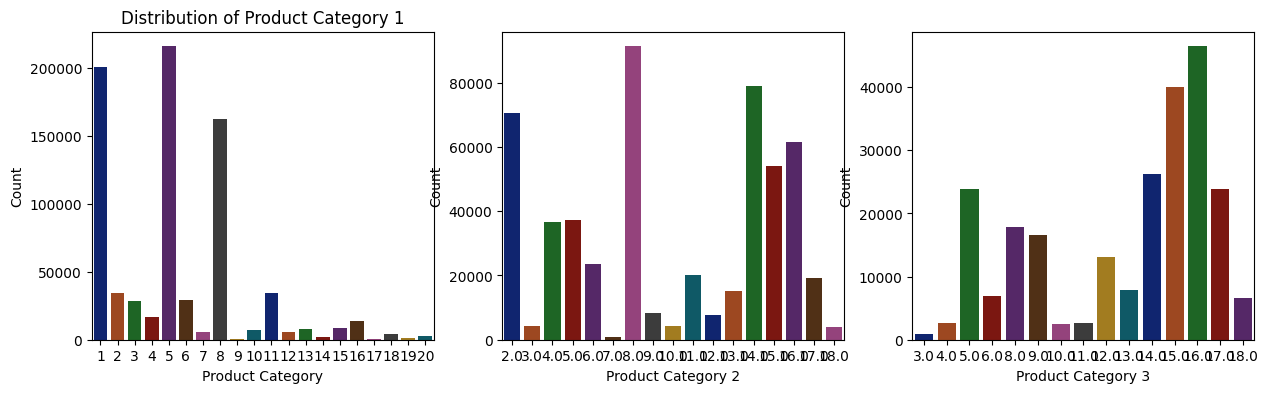

In [168]:
###visualizing the distribution of product categories 

plt.rcParams['figure.figsize'] = (15, 4)


plt.subplot(131)
sns.countplot(df['Product_Category_1'],palette= 'dark')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.title('Distribution of Product Category 1')

plt.subplot(132)
sns.countplot(df['Product_Category_2'],palette= 'dark')
plt.xlabel('Product Category 2')
plt.ylabel('Count')

plt.subplot(133)
sns.countplot(df['Product_Category_3'],palette ='dark')
plt.xlabel('Product Category 3')
plt.ylabel('Count')
plt.show()

In [169]:
###checking the dependency of product category 1 on purchasing power
df[['Product_Category_1','Purchase']].groupby('Product_Category_1').mean()

,Purchase
Product_Category_1,
1,13606.218596
2,11251.935384
3,10096.705734
4,2329.659491
5,6240.088178
6,15838.478550
7,16365.689600
8,7498.958078
9,15537.375610


In [170]:
###checking the dependency of product category2 on purchasing power
df[['Product_Category_2','Purchase']].groupby('Product_Category_2').mean()

,Purchase
Product_Category_2,
2.0,13619.356401
3.0,11235.359570
4.0,10215.192001
5.0,9027.821574
6.0,11503.551379
7.0,6884.683706
8.0,10273.259518
9.0,7277.006851
10.0,15648.729543


In [171]:
###checking the dependency of product category 3 on purchasing power
df[['Product_Category_3','Purchase']].groupby('Product_Category_3').mean()

,Purchase
Product_Category_3,
3.0,13939.696574
4.0,9794.386667
5.0,12117.786889
6.0,13194.311043
8.0,13024.918882
9.0,10431.697210
10.0,13505.813441
11.0,12091.437673
12.0,8715.512762


In [172]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

#### removing unwanted columns

In [173]:
### we should ssave the data before dropping the colmn
user_id=df['User_ID']
product_id=df['Product_ID']

In [174]:
df.drop(['User_ID', 'Product_ID'],axis=1,inplace=True)

In [175]:
df.shape

(783667, 10)

In [176]:
df.dtypes

Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

#### converting categorical data into numerical 

In [177]:
df['Gender']=df['Gender'].map({'F':0,'M':1})

In [178]:
df['Gender']###checking the column after transformation

0         0
1         0
2         0
3         0
4         1
         ..
233594    0
233595    0
233596    0
233597    0
233598    0
Name: Gender, Length: 783667, dtype: int64

#### Transformation of Age column

In [179]:
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [180]:
df['Age']=df['Age'].map({'0-17':1, '55+':7, '26-35':3, '46-50':5, '51-55':6, '36-45':4, '18-25':2})

#### Transformation of City_Category column

In [184]:
df['City_Category'].unique()

array(['A', 'C', 'B'], dtype=object)

In [186]:
df['City_Category']=df['City_Category'].map({'A':1,'B':2,'C':3})

In [188]:
df.dtypes ###checking the datatypes of the dataset after transformation

Gender                          int64
Age                             int64
Occupation                      int64
City_Category                   int64
Stay_In_Current_City_Years      int32
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                      float64
dtype: object

In [190]:
df.isnull().sum() ###checking missing values

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [193]:
# filling the missing values

df['Product_Category_2'].fillna(0, inplace = True)
df['Product_Category_3'].fillna(0, inplace = True)

df.isnull().sum()

Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

In [196]:
df1=df[df['Purchase'].isnull()] ####this is my test data which is now ready after data presprocessing and visualisation

In [198]:
df1.to_csv('test_data_ready')###test data

In [200]:
df.dropna(inplace=True) ###dropping the test value from train data

In [201]:
df ###train data

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,1,10,1,2,0,3,0.0,0.0,8370.0
1,0,1,10,1,2,0,1,6.0,14.0,15200.0
2,0,1,10,1,2,0,12,0.0,0.0,1422.0
3,0,1,10,1,2,0,12,14.0,0.0,1057.0
4,1,7,16,3,4,0,8,0.0,0.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
550063,1,6,13,2,1,1,20,0.0,0.0,368.0
550064,0,3,1,3,3,0,20,0.0,0.0,371.0
550065,0,3,15,2,4,1,20,0.0,0.0,137.0
550066,0,7,1,3,2,0,20,0.0,0.0,365.0


#### visualising age column vs purchase column

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


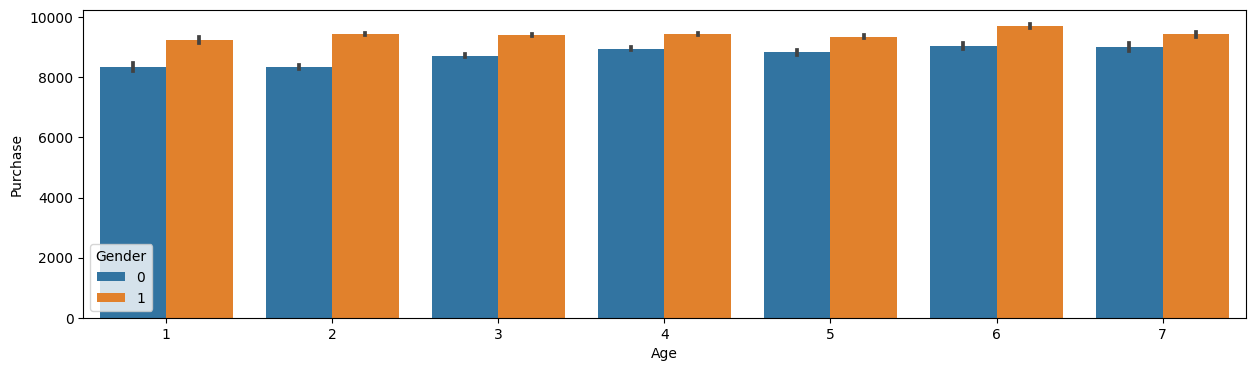

In [203]:
sns.barplot('Age','Purchase',hue='Gender',data=df)
plt.show()

#### visualising occupation vs gender vs purchase 

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


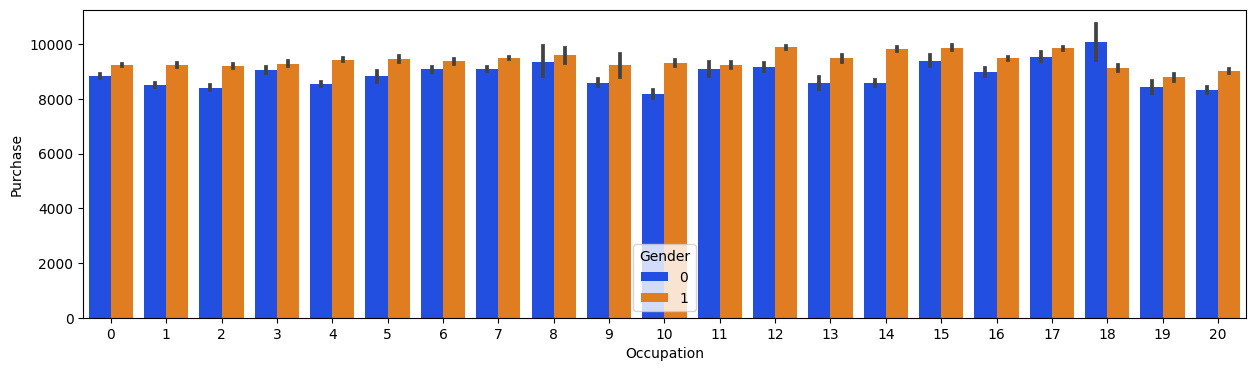

In [210]:
sns.barplot('Occupation','Purchase',hue='Gender',data=df,palette='bright')
plt.show()

#### visualising MArital status vs occupation vs purchase

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


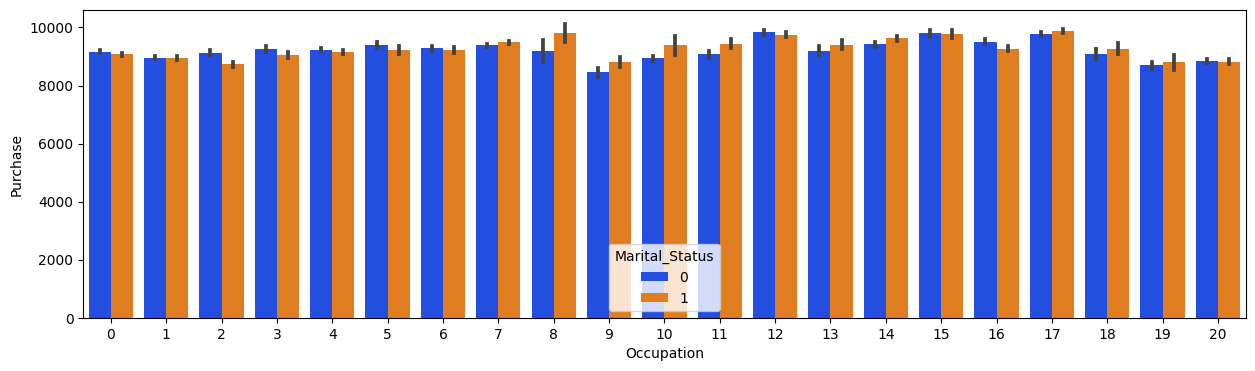

In [209]:
sns.barplot('Occupation','Purchase',hue='Marital_Status',data=df,palette='bright')
plt.show()

### Visualizing Product_category1 Vs Purchased.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


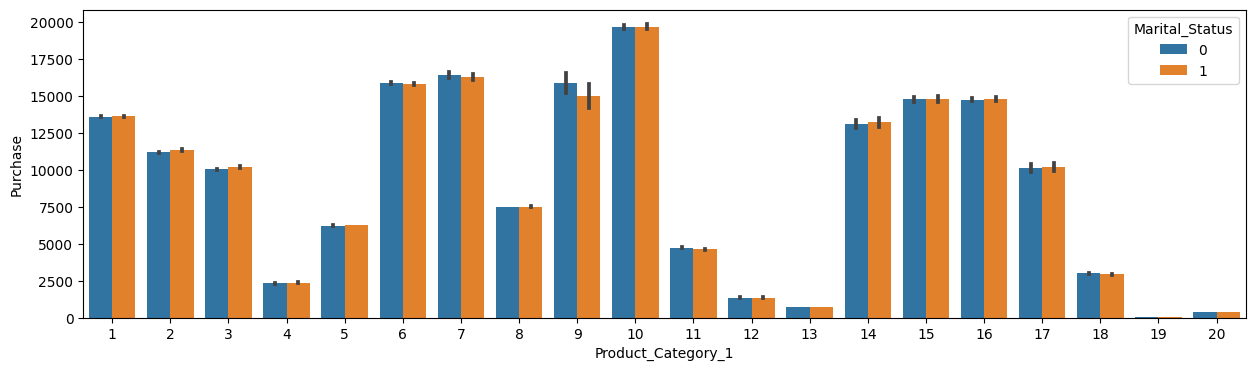

In [227]:
sns.barplot('Product_Category_1','Purchase',hue='Marital_Status',data=df)
plt.show()

#### Visualizing Product_category2 Vs Purchased.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


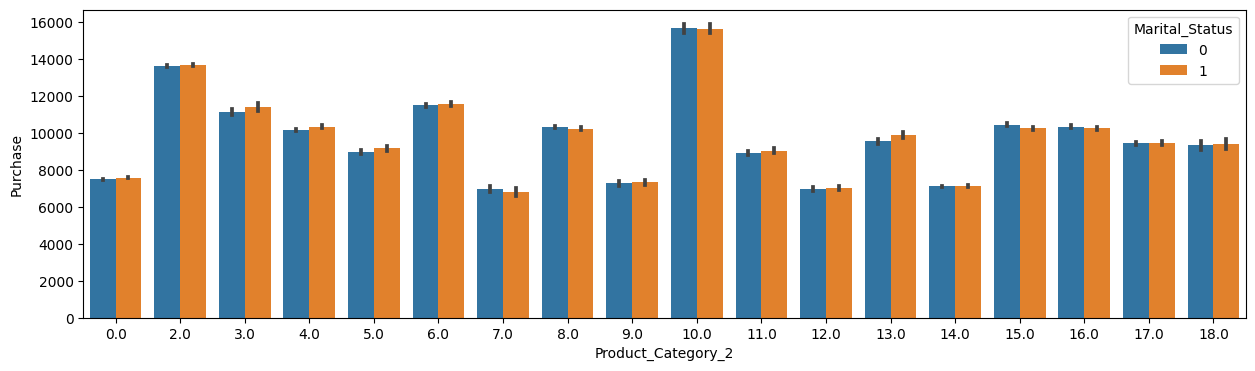

In [212]:
sns.barplot('Product_Category_2','Purchase',hue='Marital_Status',data=df)
plt.show()

#### Visualizing Product_category3 Vs Purchased.

D:\anaconda\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


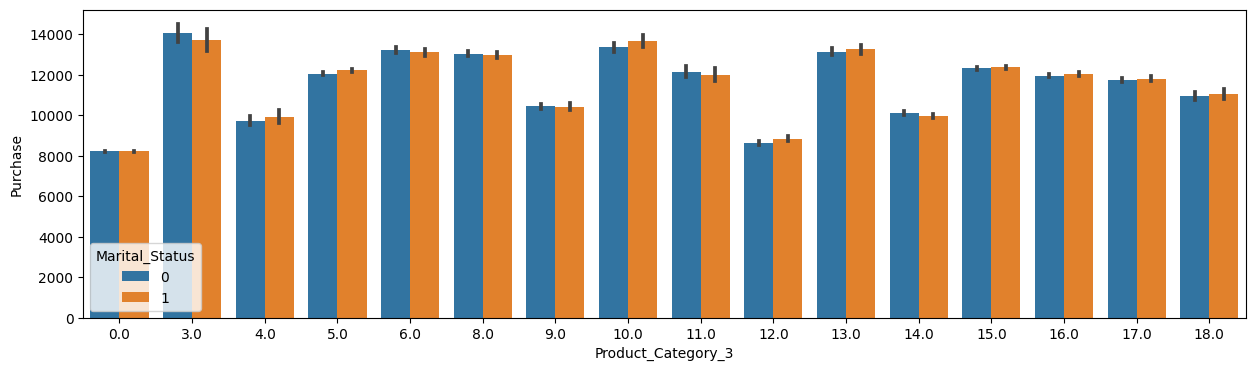

In [213]:
sns.barplot('Product_Category_3','Purchase',hue='Marital_Status',data=df)
plt.show()

### One thing we can clearly conclude is that there is no such variation in the percentage of the purchasing whether the person is married or not.Product category3 is much more purchased by people than product category2 and product category1 

### So the company should give more personalized offers on product category 3 

### X and Y Split

In [217]:
X=df.drop('Purchase',axis=1)
y=df['Purchase']

###checking the shape of x and y
print(X.shape)
print(y.shape)

(550068, 9)
(550068,)


### Train and Test split


In [218]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(412551, 9)
(412551,)
(137517, 9)
(137517,)


### Feature Scaling

In [221]:
# Feature Scaling So that data in all the columns are to the same scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [222]:
X_train

array([[ 0.57183532,  0.37160547, -0.16508218, ...,  0.65996761,
        -1.08307783, -0.6134813 ],
       [ 0.57183532, -1.84323673,  0.29498605, ..., -0.86470133,
         0.20392448,  2.27000958],
       [ 0.57183532, -0.36667526,  0.6016982 , ..., -0.10236686,
         0.20392448, -0.6134813 ],
       ...,
       [-1.74875521, -1.10495599, -1.08521865, ..., -0.10236686,
        -1.08307783, -0.6134813 ],
       [-1.74875521, -1.10495599, -0.62515041, ...,  0.65996761,
         1.16917622, -0.6134813 ],
       [-1.74875521, -1.10495599, -0.93186257, ..., -0.10236686,
         1.16917622, -0.6134813 ]])

In [224]:
X_test

array([[ 0.57183532,  1.84816694,  1.67519074, ..., -1.11881282,
        -0.76132725,  1.9496217 ],
       [-1.74875521,  0.37160547,  0.44834212, ..., -1.11881282,
         1.33005151,  1.9496217 ],
       [-1.74875521,  0.37160547, -1.23857472, ...,  0.65996761,
         1.33005151, -0.6134813 ],
       ...,
       [ 0.57183532,  0.37160547, -0.47179434, ..., -0.10236686,
        -1.08307783, -0.6134813 ],
       [ 0.57183532,  0.37160547, -1.08521865, ...,  1.42230207,
        -1.08307783, -0.6134813 ],
       [-1.74875521,  0.37160547, -0.31843826, ..., -1.11881282,
         1.4909268 , -0.6134813 ]])

### Model Building

In [226]:

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

from math import *

model = GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 2, learning_rate = 0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


# finding the mean_squared error
mse = mean_squared_error(y_test, y_pred)
print("RMSE Error:", np.sqrt(mse))

# finding the r2 score or the variance
r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)


RMSE Error: 2937.7320498105037
R2 Score: 0.6569034119964317
